<h1>Степанов Вячеслав Анатольевич </h1>

<h3>БСВ23-01 </h3>

In [104]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
def function_show(x, y, min_x, min_y, method_name):
    fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
    ax.scatter(min_x, min_y, color="blue", marker='X', s=100, zorder=1, label="Корень")
    ax.plot(x, y, lw=2, color='red', zorder=0, label="Функция")
    
    # Линия y=0
    ax.axhline(0, color='green', lw=2, linestyle='--', zorder=0, label="y = 0")  
    ax.set_xlabel('x', fontsize=14)
    ax.set_ylabel('y', fontsize=14)
    ax.set_title("Метод: " + method_name)
    ax.grid()
    ax.legend()
    ax.set_axisbelow(True)
    ax.annotate(f'({min_x:.3f}, {min_y:.3f})', xy=(min_x, min_y), xytext=(min_x, min_y + 0.1),
                textcoords='offset points', ha='center', color='blue', weight='bold')
    plt.show()

# Методы минимизации 

## Метод равномерного поиска

In [106]:
# Метод Свенна для поиска начального интервала
def sven_method(x0, t, func):
    f0 = func(x0)
    f1 = func(x0 - t)
    f2 = func(x0 + t)
    
    if f1 >= f0 and f0 <= f2:
        return x0 - t, x0 + t
    else:
        raise ValueError("Не удалось найти начальный интервал неопределенности методом Свенна")

# Алгоритм равномерного поиска
def uniform_search(x0,N,t, func):
    a0, b0 = sven_method(x0, t, func)
    x = np.linspace(a0, b0, N + 2)
    f_values = func(x)
    
    k = np.argmin(f_values)
    if k == 0 or k == N + 1:
        raise ValueError("Граница интервала содержит минимум, увеличьте интервал")
    
    x_min = x[k]
    f_min = f_values[k]
    interval = (x[k - 1], x[k + 1])

    # Вывод значений
    print("Метод равномерного поиска:")
    print(f"Точка минимума: x* ≈ {x_min}")
    print(f"Минимальное значение функции: f(x*) ≈ {f_min}")

    # График
    plt.plot(x, f_values, 'bo-', label='f(x)')
    plt.plot(x_min, f_min, 'ro', label='Минимум f(x)')
    plt.axvline(x=interval[0], color='g', linestyle='--', label='Границы интервала')
    plt.axvline(x=interval[1], color='g', linestyle='--')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Метод равномерного поиска')
    plt.legend()
    plt.grid(True)
    plt.show()
    return x_min, f_min, interval, x, f_values


## Метод деления интервала пополам

In [107]:
# Метод деления интервала пополам
def div_int_in_half(x_min, x_max, function, epsilon=0.01):
    a,b = x_min,x_max
    if function(x_max) * function(x_min) > 0:
        print("Метод деления интервала пополам не работает для данной функции")
        return None

    half = (x_min + x_max) / 2

    while np.abs(x_max - x_min) >= epsilon:
        if function(half) == 0:
            break  # Выход из цикла, если найден точный корень

        if function(x_min) * function(half) > 0:
            x_min = half
        else:
            x_max = half

        half = (x_min + x_max) / 2

    x = np.linspace(a, b, 400)
    y = function(x)

    function_show(x, y, half, function(half), "деления интервала пополам")
    return 



## Метод дихотомии

In [108]:
#  Метод дихотомии
def dichotomy_search(min_x, max_x, function, epsilon=0.01):
    a,b = min_x,max_x
    delta = epsilon / 2
    while (max_x - min_x) / 2 > epsilon:
        mid = (min_x + max_x) / 2
        left_border = mid - delta
        right_border = mid + delta
        
        if function(left_border) < function(right_border):
            max_x = right_border
        else:
            min_x = left_border
    min_x = (min_x + max_x) / 2
    min_y = function(min_x)
    x = np.linspace(a, b, 400)
    y = function(x)
    function_show(x, y, min_x, min_y, "Метод дихотомии")


## Метод золотого сечения

In [109]:
# Метод золотого сечения
def golden_section_search(x_min, x_max, function, epsilon=0.01):
    a,b = x_min,x_max
    phi = (1 + np.sqrt(5)) / 2 

    x1 = x_max - (x_max - x_min) / phi
    x2 = x_min + (x_max - x_min) / phi
    y_1 = function(x1)
    y_2 = function(x2)
    
    while (x_max - x_min) > epsilon:
        if y_1 < y_2:
            x_max = x2
            x2 = x1
            y_2 = y_1
            x1 = x_max - (x_max - x_min) / phi
            y_1 = function(x1)
        else:
            x_min = x1
            x1 = x2
            y_1 = y_2
            x2 = x_min + (x_max - x_min) / phi
            y_2 = function(x2)
    
    min_x = (x_min + x_max) / 2
    min_y = function(min_x)

    x = np.linspace(a, b, 400)
    y = function(x)

    function_show(x, y, min_x, min_y, "Метод золотого сечения")
    return


# Задачи минимизации

## $$ y = x^2 - 3x + \ln{x}, x \in [1, 2]$$

Метод равномерного поиска:
Точка минимума: x* ≈ 0.995049504950495
Минимальное значение функции: f(x*) ≈ -1.999987786891389


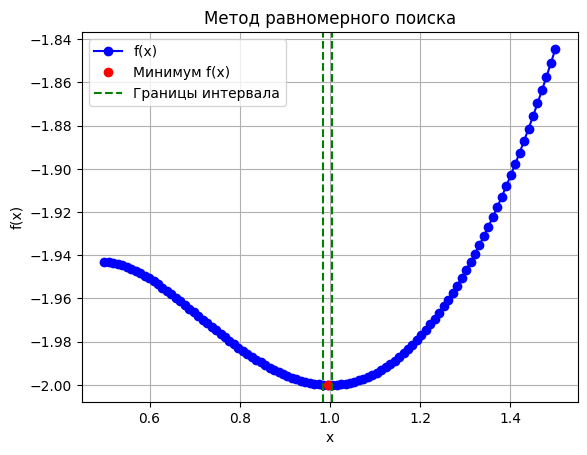

Метод деления интервала пополам не работает для данной функции


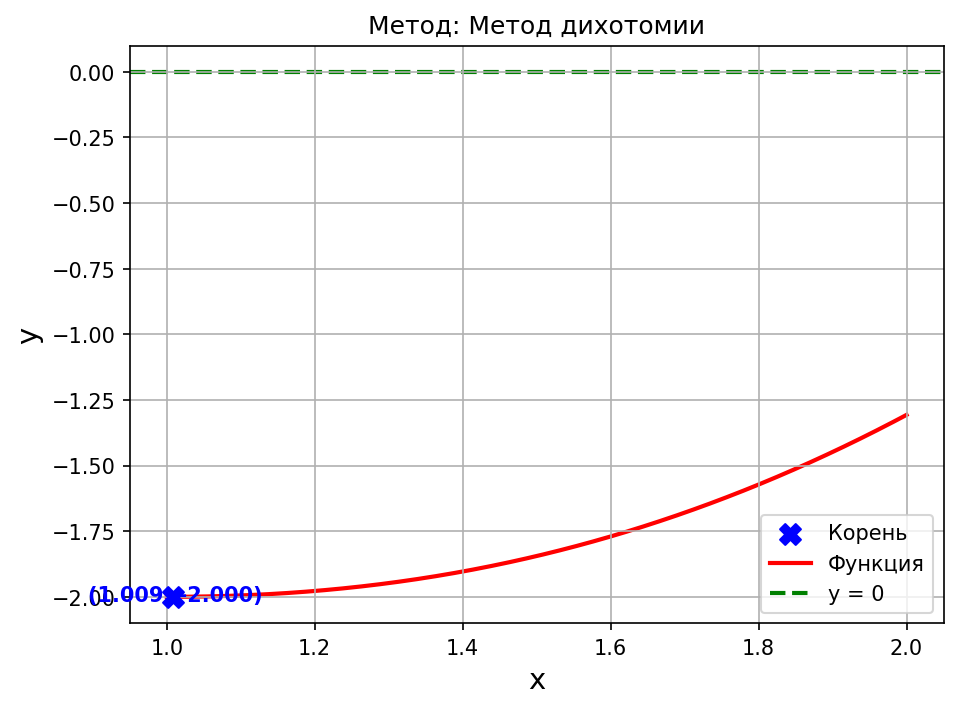

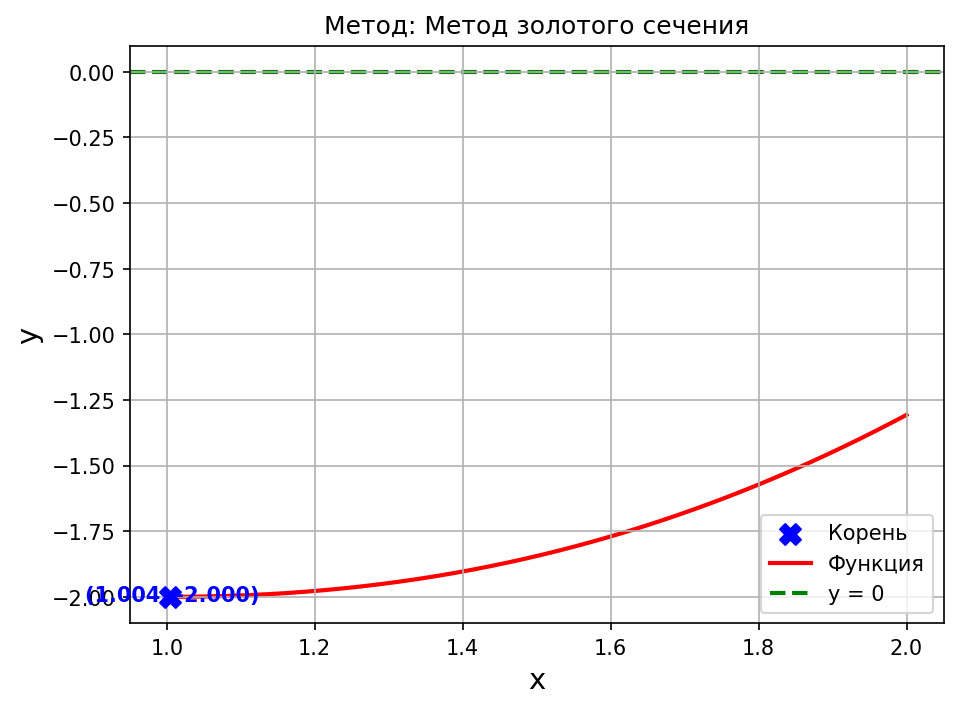

In [117]:
def f(x):
    return x**2 - 3 * x + np.log(x)
min_x = 1
max_x = 2
uniform_search(1, 100, 0.5,f)
div_int_in_half(min_x,max_x,f)
dichotomy_search(min_x,max_x,f)
golden_section_search(min_x,max_x,f)

## $$ y = 0.25x^4 + x^2 -8x + 12, x \in [0, 2]$$

Метод равномерного поиска:
Точка минимума: x* ≈ 1.668316831683168
Минимальное значение функции: f(x*) ≈ 3.37340974945527


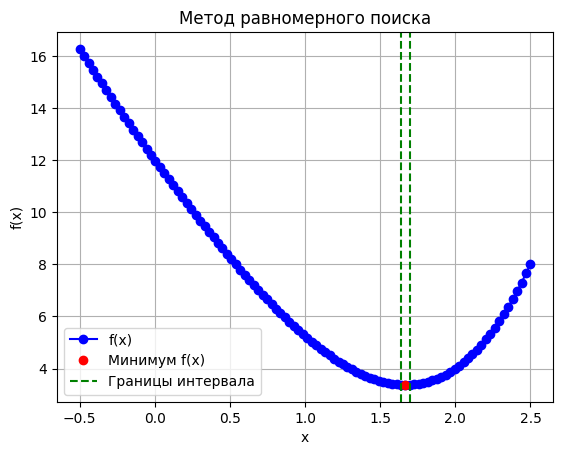

Метод деления интервала пополам не работает для данной функции


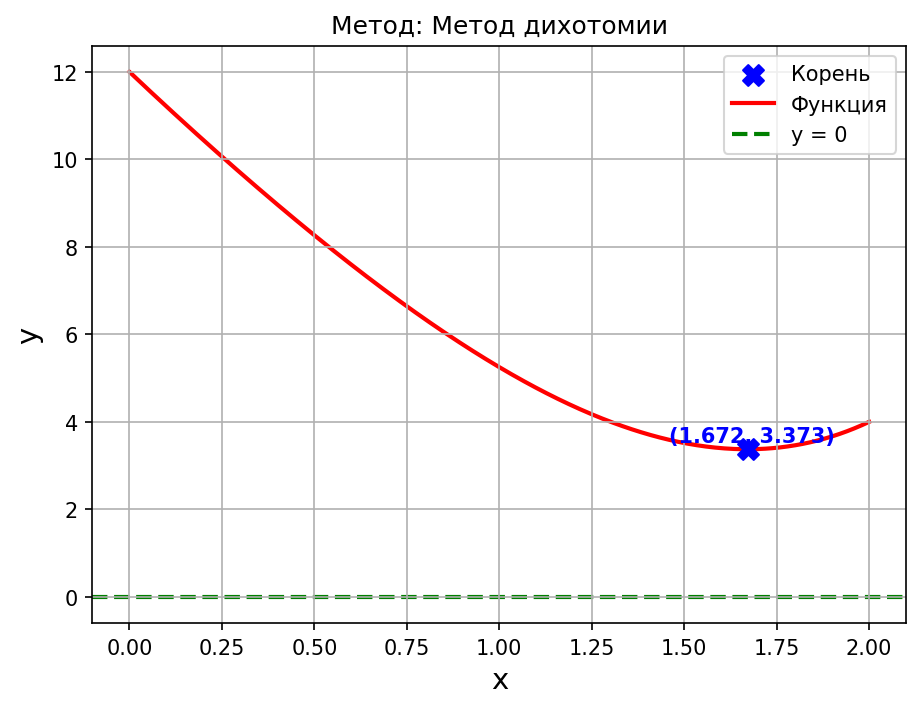

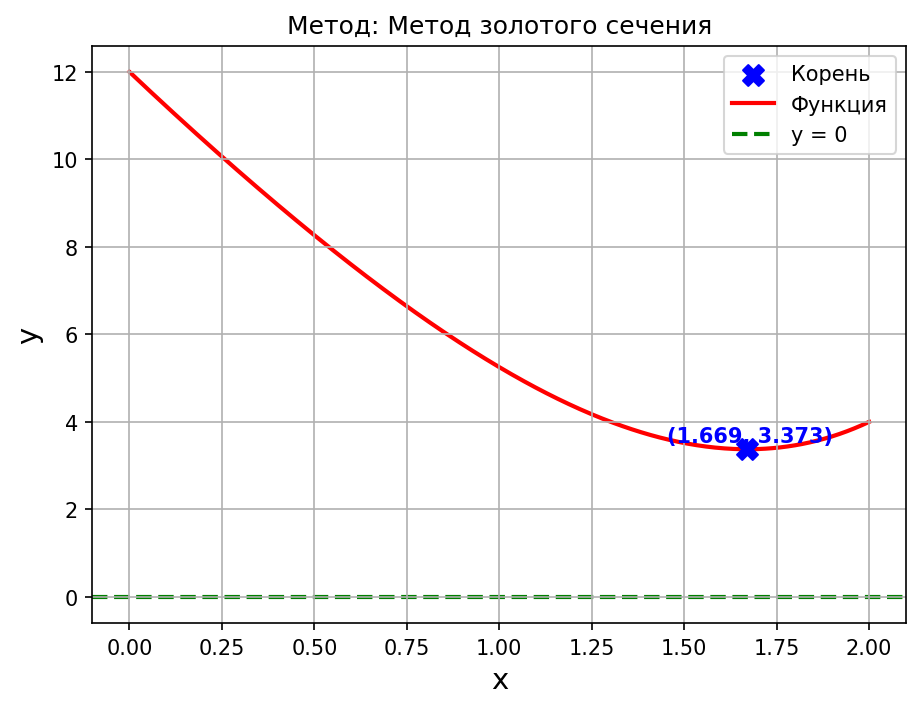

In [130]:
def f(x):
    return 0.25*x**4 + x**2 - 8*x + 12
min_x = 0
min_y = 2
# x0 = 1.5, N = 100, t = 0.5
uniform_search(1,100,1.5, f)
div_int_in_half(min_x,max_x,f)
dichotomy_search(min_x,max_x,f)
golden_section_search(min_x,max_x,f)

## $$ y = x^6 - 2.08x^5 + 0.4875x^4 +7.1x^3 -3.95x^2 - x + 0.1, x \in [-2, 2]$$

Метод равномерного поиска:
Точка минимума: x* ≈ -1.193069306930693
Минимальное значение функции: f(x*) ≈ -7.487186155716011


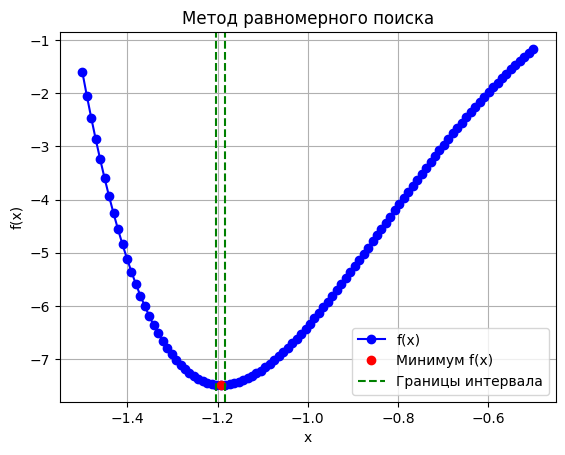

Метод деления интервала пополам не работает для данной функции


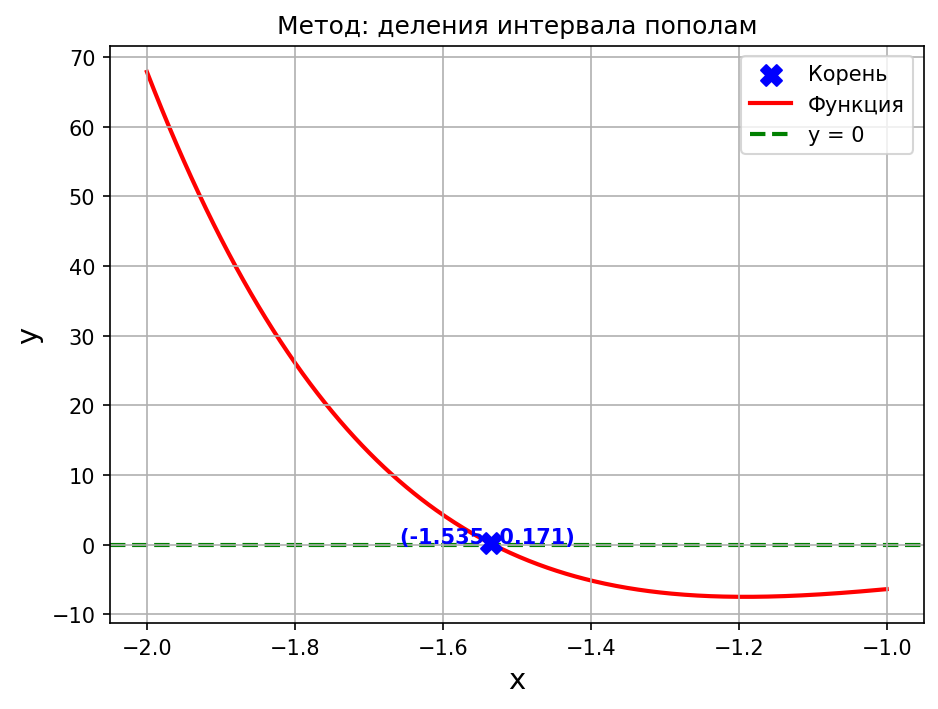

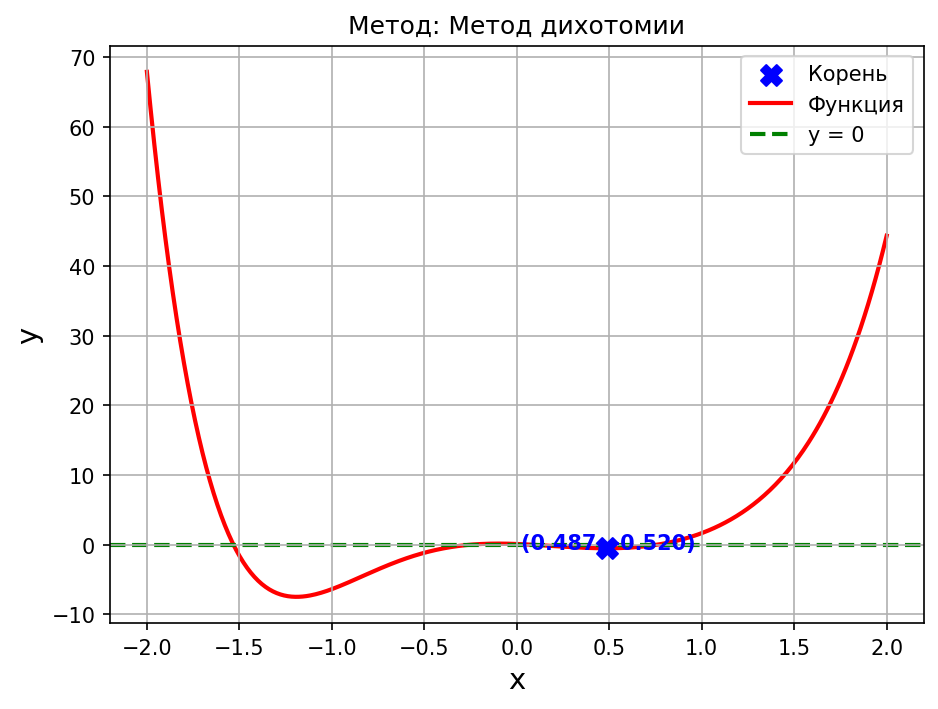

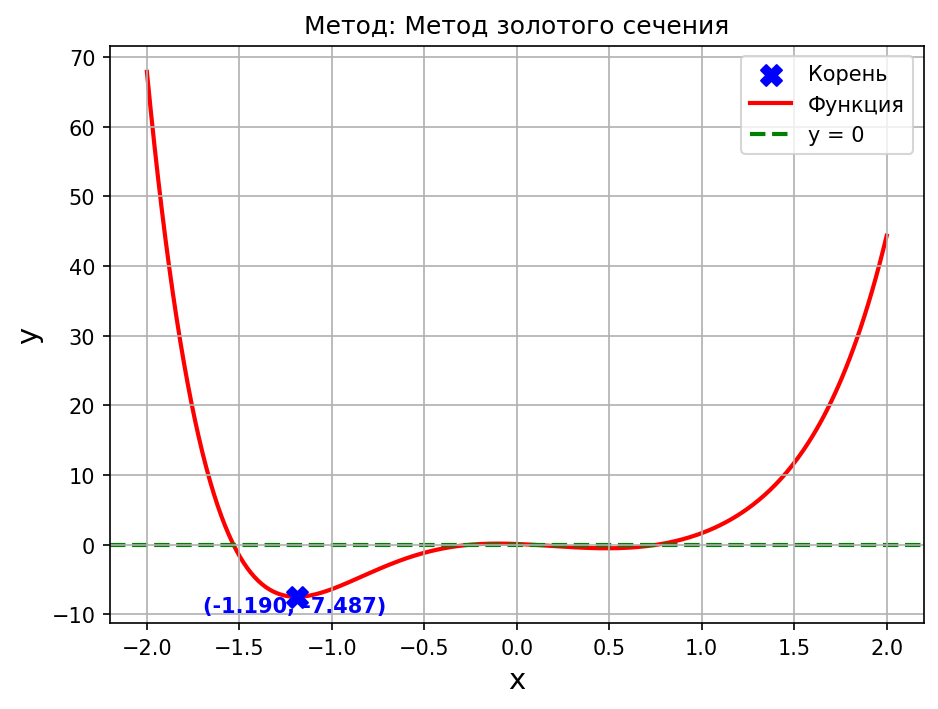

In [132]:
def f(x):
    return x**6 - 2.08 * x**5 + 0.4875 * x**4 + 7.1 * x**3 - 3.95 * x**2 - x +0.1
min_x = -2
min_y = 2

uniform_search(-1,100,0.5,f)
div_int_in_half(min_x,max_x,f)

# Но метод деления интервала пополам работает, если изменить интервал 
div_int_in_half(min_x,-1,f)
dichotomy_search(min_x,max_x,f)
golden_section_search(min_x,max_x,f)

## $$ y = 2 - \sin{6x} - \sin{4x}, x \in [0, 2.8]$$

Метод равномерного поиска:
Точка минимума: x* ≈ 0.30891089108910896
Минимальное значение функции: f(x*) ≈ 0.09532550757862024


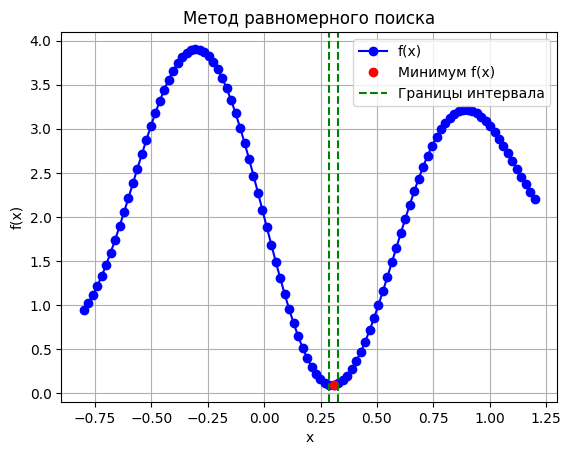

Метод деления интервала пополам не работает для данной функции


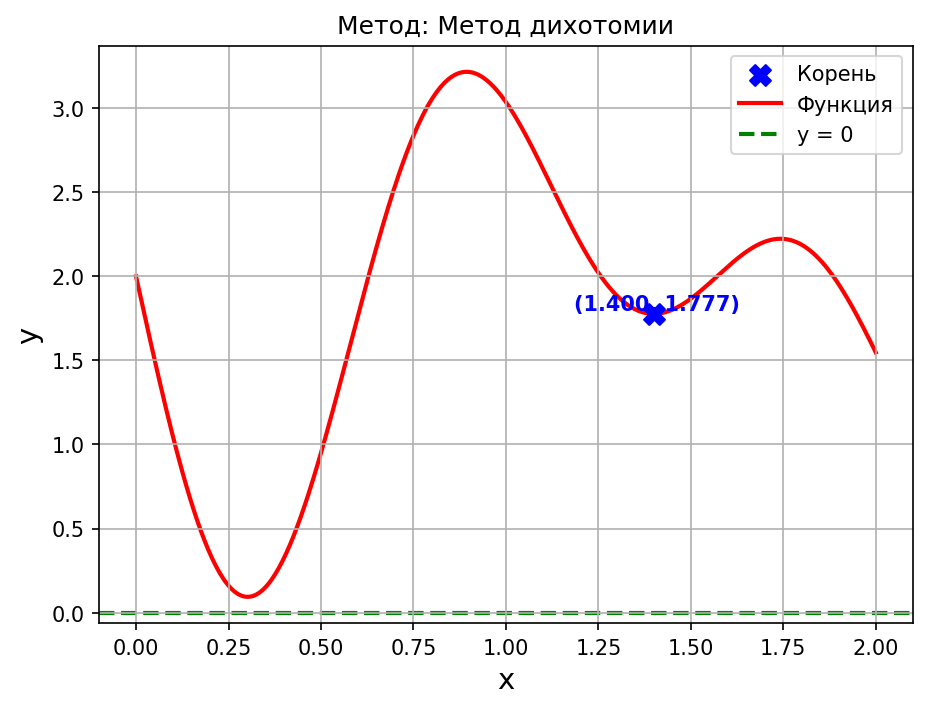

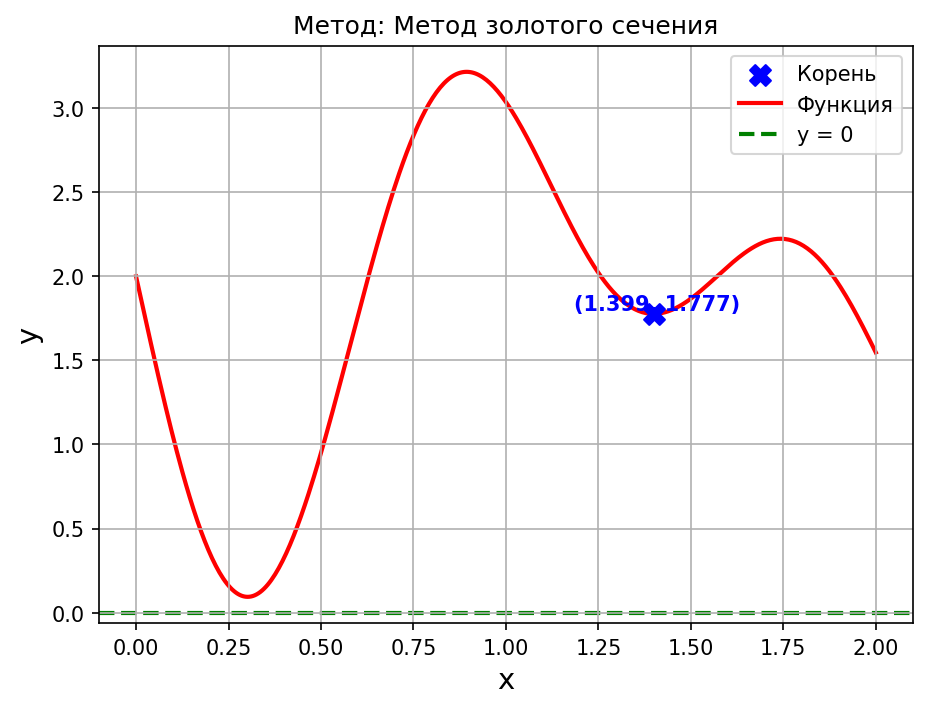

In [167]:
def f(x):
    return 2 - np.sin(6 * x) - np.sin(4 * x)
min_x = 0
min_y = 2.8

uniform_search(0.2,100,1,f)
div_int_in_half(min_x,max_x,f)
dichotomy_search(min_x,max_x,f)
golden_section_search(min_x,max_x,f)